In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
dataset = pd.read_csv('titanicdataset.csv')

In [3]:
print("Total Rows: {}\nTotal Columns: {}".format(dataset.shape[0],dataset.shape[1]))

Total Rows: 418
Total Columns: 12


In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleaning and Processing

In [5]:
#Cleaning Name Field and Using only Title
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

dataset['Title'] = dataset['Name'].apply(get_title)
#dataset['Title'].unique()
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
dataset['Title'] = dataset['Title'].map(title_mapping)
dataset['Title'] = dataset['Title'].fillna(0)

In [6]:
#Assigning Male as 1 and Female as 0
dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [7]:
#If Cabin the 1 else 0
dataset['Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [8]:
#Assigning C as 0,Q as 1 and S as 2
dataset['Embarked'] = dataset["Embarked"].map( {'C': 0, 'Q': 1, 'S':2} ).astype(int)

In [9]:
#Finding out if the passenger is alone and if not,how many family members does he have
dataset['IsAlone'] = 0
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [10]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsAlone,FamilySize
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,1,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,2,3,0,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,1,1,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,2,1,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,2,3,0,3


In [11]:
#Deleting columns PassengerId,Name and Ticket as they are not neccessary
drop_elements = ['PassengerId', 'Name', 'Ticket']
dataset = dataset.drop(drop_elements, axis = 1)

In [12]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,IsAlone,FamilySize
0,0,3,1,34.5,0,0,7.8292,0,1,1,1,1
1,1,3,0,47.0,1,0,7.0000,0,2,3,0,2
2,0,2,1,62.0,0,0,9.6875,0,1,1,1,1
3,0,3,1,27.0,0,0,8.6625,0,2,1,1,1
4,1,3,0,22.0,1,1,12.2875,0,2,3,0,3


In [13]:
#Removing nan values from Age Column
age_avg = dataset['Age'].mean()
age_std = dataset['Age'].std()
age_null_count = dataset['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
# Next line has been improved to avoid warning
dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
dataset['Age'] = dataset['Age'].astype(int)

In [14]:
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age'] = 4;

In [15]:
dataset.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,IsAlone,FamilySize
0,0,3,1,2,0,0,7.8292,0,1,1,1,1
1,1,3,0,2,1,0,7.0000,0,2,3,0,2
2,0,2,1,3,0,0,9.6875,0,1,1,1,1
3,0,3,1,1,0,0,8.6625,0,2,1,1,1
4,1,3,0,1,1,1,12.2875,0,2,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,2,0,0,8.0500,0,2,1,1,1
414,1,1,0,2,0,0,108.9000,1,0,5,1,1
415,0,3,1,2,0,0,7.2500,0,2,1,1,1
416,0,3,1,1,0,0,8.0500,0,2,1,1,1


In [16]:
dataset = dataset.fillna(0)
dataset['Fare'] = dataset['Fare'].astype(int)
dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

In [17]:
drop_elements2 = ['Parch', 'SibSp']
dataset = dataset.drop(drop_elements2, axis = 1)

### Correlation of each feature in the dataset

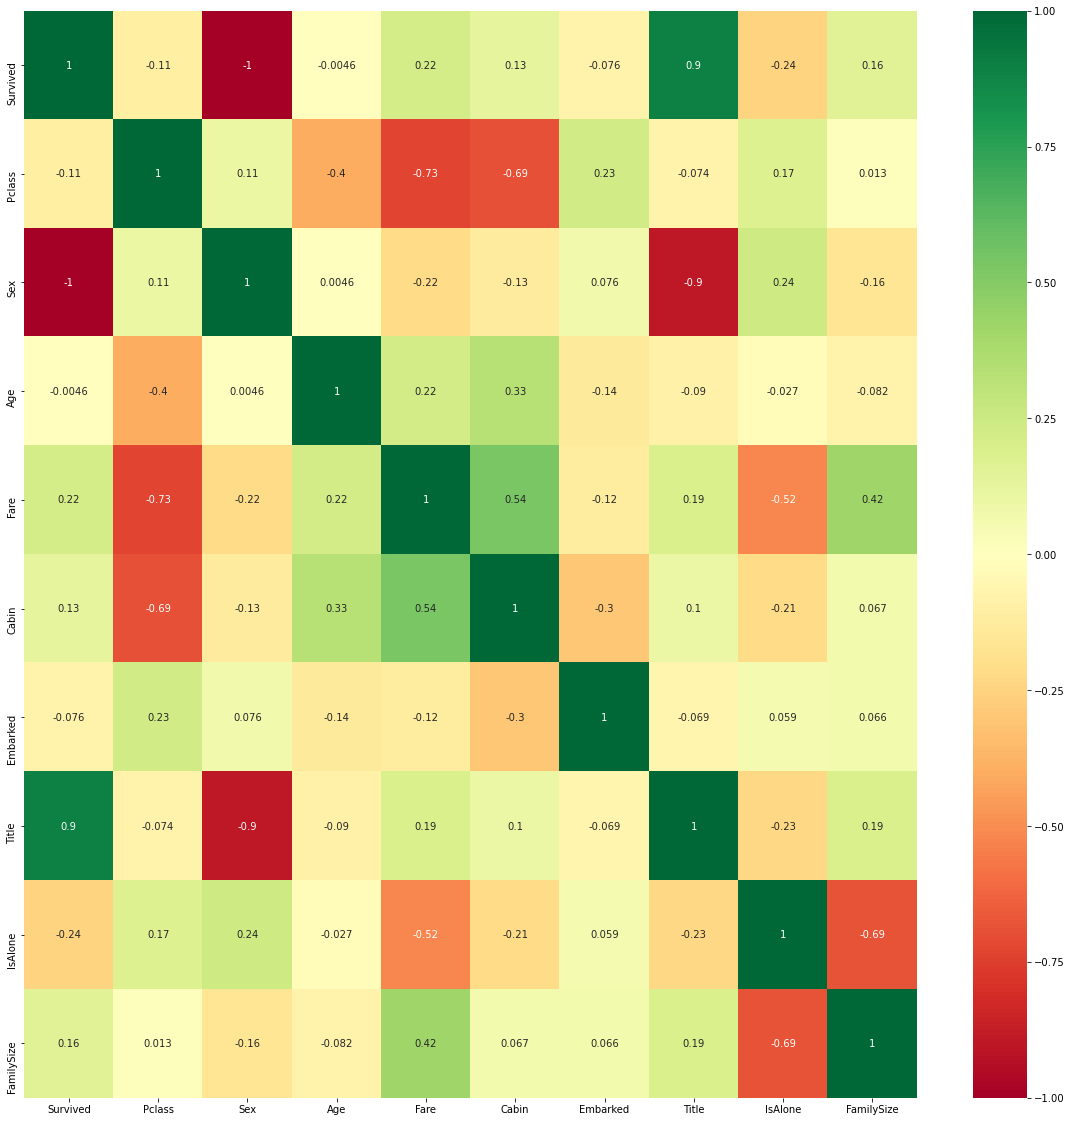

In [18]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Building the Model

In [33]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [31]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9649639780825646

##### After trying various regression algorithms, the SVR model gives the best accuracy.Though models like Random Forest,Decision Tree and other were giving 100% accuracy but that may lead to overfitting and hence the SVR model is considered as it gives the next highest accuracy.